In [7]:
from __future__ import print_function
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import matplotlib.pyplot as plt



In [8]:
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [9]:
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 8

In [10]:
#/content/gdrive/My Drive/DL Project/fer2013.csv
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [11]:
with open("/content/gdrive/My Drive/DL Project/fer2013.csv") as f:
	content = f.readlines()

In [12]:
lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)

x_train, y_train, x_test, y_test = [], [], [], []

number of instances:  35888


In [13]:
for i in range(1,num_of_instances):
  try:
    emotion, img, usage = lines[i].split(",")

    val = img.split(" ")
    pixels = np.array(val, 'float32')

    emotion = to_categorical(emotion, num_classes)

    if 'Training' in usage:
      y_train.append(emotion)
      x_train.append(pixels)
    elif 'PublicTest' in usage:
      y_test.append(emotion)
      x_test.append(pixels)
  except:
    print("", end="")

In [14]:
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [15]:
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(7, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
cnn4.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
history = cnn4.fit(x_train,
         y_train,
         batch_size=120,
         epochs=30,
         validation_data=(x_test, y_test)
         )

Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - ETA: 0s - loss: 2.1059 - acc: 0.2817

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


28709/28709 [==============================] - 354s 12ms/sample - loss: 2.1059 - acc: 0.2817 - val_loss: 2.2257 - val_acc: 0.2407
Epoch 2/30
28709/28709 [==============================] - 351s 12ms/sample - loss: 1.6013 - acc: 0.3915 - val_loss: 1.6155 - val_acc: 0.3608
Epoch 3/30
28709/28709 [==============================] - 348s 12ms/sample - loss: 1.4382 - acc: 0.4477 - val_loss: 1.4604 - val_acc: 0.4461
Epoch 4/30
28709/28709 [==============================] - 351s 12ms/sample - loss: 1.3542 - acc: 0.4814 - val_loss: 1.2912 - val_acc: 0.5057
Epoch 5/30
28709/28709 [==============================] - 353s 12ms/sample - loss: 1.3000 - acc: 0.5063 - val_loss: 1.2880 - val_acc: 0.5077
Epoch 6/30
28709/28709 [==============================] - 356s 12ms/sample - loss: 1.2594 - acc: 0.5231 - val_loss: 1.2902 - val_acc: 0.5043
Epoch 7/30
28709/28709 [==============================] - 354s 12ms/sample - loss: 1.2199 - acc: 0.5406 - val_loss: 1.2457 - val_acc: 0.5238
Epoch 8/30
28709/28709 [

In [17]:
train_score = cnn4.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = cnn4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.428030126731329
Train accuracy: 85.49235463142395
Test loss: 1.1765036651370053
Test accuracy: 60.51825284957886


In [ ]:
predictions1 = cnn4.predict(x_test)

pred_list1 = []; actual_list1 = []
 
for i in predictions1:
	pred_list1.append(np.argmax(i))
 
for i in y_test:
	actual_list1.append(np.argmax(i))
 
conf_matrix = confusion_matrix(actual_list1, pred_list1)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

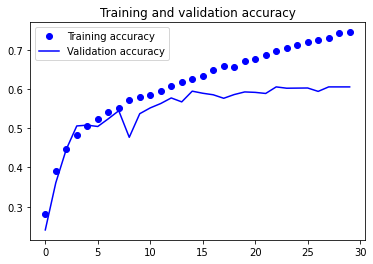

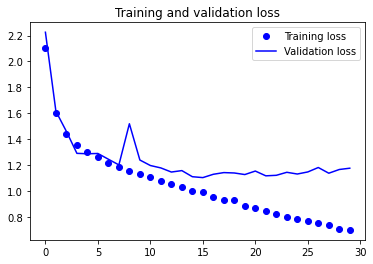

In [19]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
print(cnn4.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 44, 44, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                        

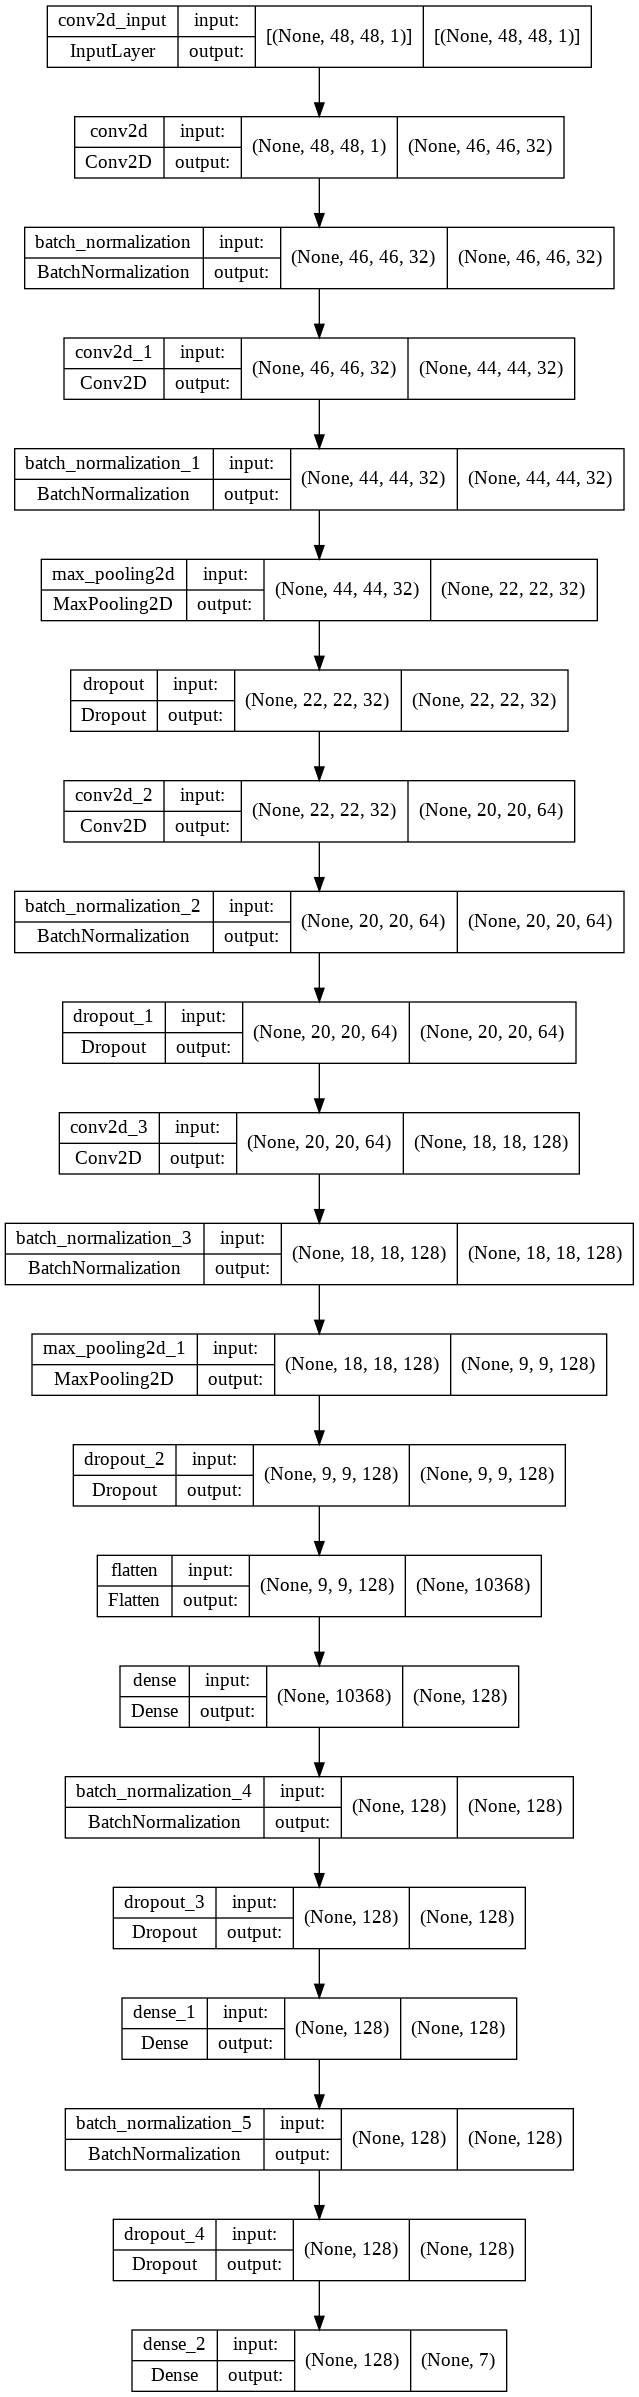

In [21]:
from keras.utils.vis_utils import plot_model

plot_model(cnn4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
from keras.models import model_from_json

model_json = cnn4.to_json()
with open("/content/gdrive/My Drive/DL Project/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn4.save_weights("/content/gdrive/My Drive/DL Project/model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(x_test, y_test, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

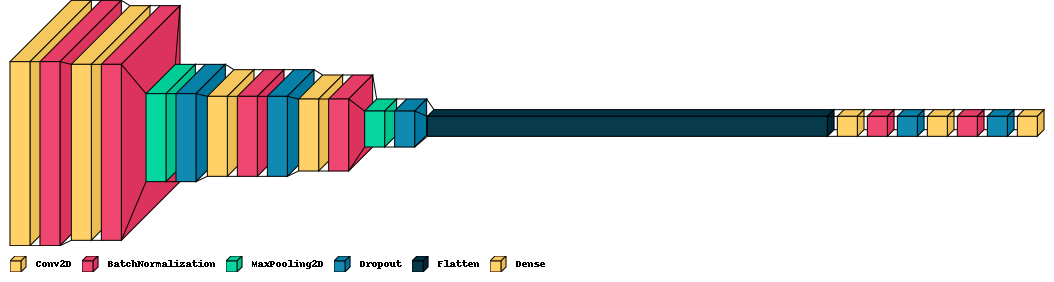

In [36]:
visualkeras.layered_view(cnn4,legend=True, draw_volume=True)